In [92]:
#!pip install --upgrade pip --quiet
#!pip install pandas --quiet
#!pip install seaborn --quiet
#!pip install matplotlib --quiet
#!pip install scipy --quiet
#!pip install numpy --quiet
#!pip install scikit-learn --quiet
#!pip install pydeseq2 --quiet
#!pip install pickle --quiet

In [93]:
import pandas

Dados obtidos por conversão das variáveis em R.
Usei o packages TCGA BioLinks para transferir e depois exportei.

A lógica
```r
write_csv(seqdata, 'seqdata.csv') # Para excluir os rownames e manter os nomes do gene
write_csv(meta, 'meta.csv', rownames = FALSE) # Para manter o barcode
```

In [94]:
seqdata = pandas.read_csv('./dataset/seqdata.csv')
seqdata = seqdata.rename(columns={'Unnamed: 0':'Genes'})
seqdata = seqdata.set_index('Genes')
seqdata.head()

,TCGA-38-7271-01A-11R-2039-07,TCGA-55-7914-01A-11R-2170-07,TCGA-95-7043-01A-11R-1949-07,TCGA-73-4658-01A-01R-1755-07,TCGA-86-8076-01A-31R-2241-07,TCGA-55-7726-01A-11R-2170-07,TCGA-44-6147-01A-11R-A278-07,TCGA-50-5932-01A-11R-1755-07,TCGA-44-2661-01A-01R-1107-07,TCGA-86-7954-01A-11R-2187-07,...,TCGA-50-5946-02A-11R-2090-07,TCGA-86-7713-01A-11R-2066-07,TCGA-86-8073-01A-11R-2241-07,TCGA-44-2662-01B-02R-A277-07,TCGA-MN-A4N4-01A-12R-A24X-07,TCGA-53-7626-01A-12R-2066-07,TCGA-62-A46O-01A-11R-A24H-07,TCGA-44-A47G-01A-21R-A24H-07,TCGA-55-6969-01A-11R-1949-07,TCGA-55-6969-11A-01R-1949-07
Genes,,,,,,,,,,,,,,,,,,,,,
TSPAN6,1536,2936,1475,3659,3269,1188,2178,4545,4558,9079,...,5188,8522,3418,667,3365,3249,5948,2272,2233,513
TNMD,0,0,0,188,0,0,4,0,0,3,...,0,0,0,10,0,0,0,0,0,1
DPM1,765,1447,1275,981,1540,1564,1430,1557,2089,3519,...,2778,2548,2937,554,2244,1969,1174,851,2803,754
SCYL3,510,827,373,456,1171,269,1139,1185,1025,1630,...,1031,2384,1008,716,777,1345,628,565,940,350
C1orf112,172,241,172,158,318,219,434,322,315,1097,...,969,1790,592,619,451,427,572,199,647,73


In [95]:
meta = pandas.read_csv('./dataset/meta.csv')
meta = meta.set_index('barcode')
meta.head()

,gender,expr
barcode,,
TCGA-38-7271-01A-11R-2039-07,female,NaN
TCGA-55-7914-01A-11R-2170-07,female,TRU
TCGA-95-7043-01A-11R-1949-07,female,prox.-prolif.
TCGA-73-4658-01A-01R-1755-07,female,prox.-inflam
TCGA-86-8076-01A-31R-2241-07,male,NaN


In [96]:
meta.isna().any()

gender    False
expr       True
dtype: bool

In [97]:
# Remover NAs do expr. subtype
meta_clean = meta.dropna(how='any')

if len(meta_clean) == 248:
    print(f'data set de subtipo de expressão contém 248 valores como esperado, com tamanho {len(meta_clean)}')
    
meta_clean.head()

data set de subtipo de expressão contém 248 valores como esperado, com tamanho 248


,gender,expr
barcode,,
TCGA-55-7914-01A-11R-2170-07,female,TRU
TCGA-95-7043-01A-11R-1949-07,female,prox.-prolif.
TCGA-73-4658-01A-01R-1755-07,female,prox.-inflam
TCGA-55-7726-01A-11R-2170-07,female,prox.-inflam
TCGA-44-6147-01A-11R-A278-07,female,TRU


In [98]:
# Filtrar seqdata com base no filtro
seqdata_clean = seqdata[meta_clean.index] # Não é preciso validar pois as colunas já estão pelo nome

if seqdata_clean.shape[1] == 248:
    print(f'data set de dados de expressão corretamente filtrado, com tamanho {seqdata_clean.shape[1]}')


data set de dados de expressão corretamente filtrado, com tamanho 248


In [99]:
smoke_status = pandas.read_csv('./dataset/fumo.csv')

smoke_status = smoke_status.rename(columns={
    'data.paper_Smoking.Status' : 'Smoke Habits',
    'data.years_smoked' : 'Years Smoked'})

smoke_status.drop(columns=['Unnamed: 0'], inplace=True)
smoke_status['barcode'] = meta.index

# Filtramos por Smoke Habits
smoke_status.isna().any()
smoke_status_clean = smoke_status[(smoke_status['Smoke Habits'].notna()) & (smoke_status['Smoke Habits'] != '[Not Available]')]
smoke_status_clean = smoke_status_clean[['barcode', 'Smoke Habits', 'Years Smoked']]
smoke_status_clean.head()

,barcode,Smoke Habits,Years Smoked
1,TCGA-55-7914-01A-11R-2170-07,Current smoker,NaN
2,TCGA-95-7043-01A-11R-1949-07,Current reformed smoker for < or = 15 years,39.0
3,TCGA-73-4658-01A-01R-1755-07,Current reformed smoker for > 15 years,NaN
5,TCGA-55-7726-01A-11R-2170-07,Current reformed smoker for > 15 years,24.0
6,TCGA-44-6147-01A-11R-A278-07,Current reformed smoker for > 15 years,4.0


In [100]:
vital = pandas.read_csv('./dataset/vital.csv')

vital.rename(columns={'data.barcode' : 'barcode', 'data.vital_status' : 'Vital Status'}, inplace=True)

vital_vs_smoke = pandas.merge(
    smoke_status_clean,
    vital,
    on = 'barcode',
    how = 'inner'
)

vital_vs_smoke = vital_vs_smoke[['barcode', 'Smoke Habits', 'Years Smoked', 'Vital Status']]
vital_vs_smoke['Smoke Habits'] = vital_vs_smoke['Smoke Habits'].replace(
    {'Current reformed smoker for > 15 years' : 'EX > 15 y',
    'Current reformed smoker for < or = 15 years' : 'EX <= 15 y',
    'Current smoker': 'Smokes',
    'Lifelong Non-smoker': 'Never smoked'
})
vital_vs_smoke

,barcode,Smoke Habits,Years Smoked,Vital Status
0,TCGA-55-7914-01A-11R-2170-07,Smokes,NaN,Dead
1,TCGA-95-7043-01A-11R-1949-07,EX <= 15 y,39.0,Dead
2,TCGA-73-4658-01A-01R-1755-07,EX > 15 y,NaN,Dead
3,TCGA-55-7726-01A-11R-2170-07,EX > 15 y,24.0,Alive
4,TCGA-44-6147-01A-11R-A278-07,EX > 15 y,4.0,Alive
...,...,...,...,...
232,TCGA-78-7153-01A-11R-2039-07,EX <= 15 y,40.0,Alive
233,TCGA-38-4628-01A-01R-1206-07,Never smoked,NaN,Dead
234,TCGA-86-7713-01A-11R-2066-07,Never smoked,NaN,Alive
235,TCGA-44-2662-01B-02R-A277-07,EX > 15 y,28.0,Alive


In [101]:
stage = pandas.read_csv('./dataset/stage.csv')
stage.drop(columns=['Unnamed: 0'], inplace=True)

stage = stage.rename(columns={'data$paper_Tumor.stage' : 'Tumor Stage'})

stage['barcode'] = meta.index

print(f'encontrados {stage.iloc[:, 0].isna().sum()} valores omissos',
           'foi criada uma versão filtrada')

stage_clean = stage.dropna(how='any')
stage_clean[stage_clean['barcode'].isin(meta.index)]
stage_clean




encontrados 352 valores omissos foi criada uma versão filtrada


,Tumor Stage,barcode
1,Stage IIA,TCGA-55-7914-01A-11R-2170-07
2,Stage IA,TCGA-95-7043-01A-11R-1949-07
3,Stage IB,TCGA-73-4658-01A-01R-1755-07
5,Stage IA,TCGA-55-7726-01A-11R-2170-07
6,Stage IA,TCGA-44-6147-01A-11R-A278-07
...,...,...
588,Stage IIA,TCGA-50-5055-01A-01R-1628-07
589,Stage IIB,TCGA-38-4628-01A-01R-1206-07
591,Stage IB,TCGA-86-7713-01A-11R-2066-07
593,Stage IB,TCGA-44-2662-01B-02R-A277-07


<Axes: xlabel='Vital Status'>

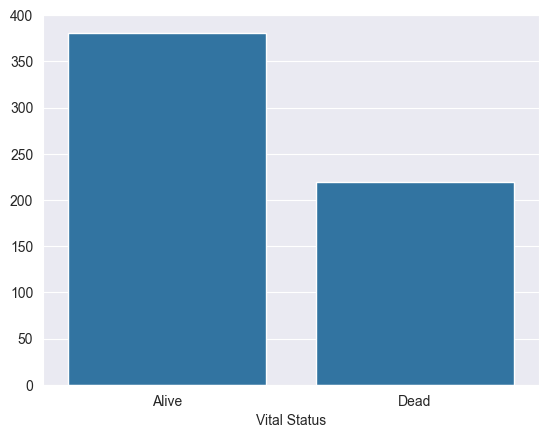

In [102]:
"""
Gráficos a correlacionar:

- smoke status com vital status?
- vital status vs stage?
"""
import seaborn
from matplotlib import pyplot

# Equivalente a table(dados)
vital_status = vital['Vital Status'].value_counts()
#vital_status

seaborn.barplot(x = vital_status.index, y = vital_status.values)

<Axes: xlabel='Smoke Habits'>

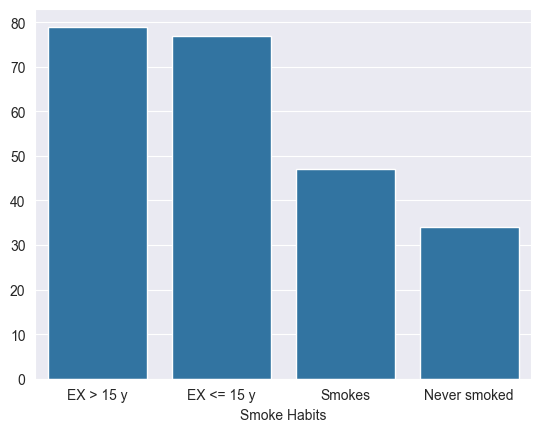

In [103]:
smoke_habit = smoke_status_clean['Smoke Habits'].value_counts()
smoke_habit = smoke_habit.rename({
    'Current reformed smoker for > 15 years': 'EX > 15 y',
    'Current reformed smoker for < or = 15 years': 'EX <= 15 y',
    'Current smoker' : 'Smokes',
    'Lifelong Non-smoker' : 'Never smoked',
})

seaborn.barplot(x = smoke_habit.index, y = smoke_habit.values)

<Axes: xlabel='gender'>

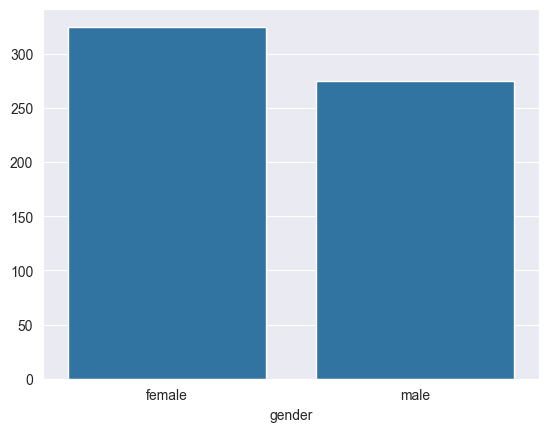

In [104]:
gender = meta['gender'].value_counts()
seaborn.barplot(x = gender.index, y = gender.values)

Estatística de teste:2.954414510442226
Graus de liberdade:3
Valor de prova:0.3987070944866199
Para alfa = 0.05:
Não é plausível considerar correlação


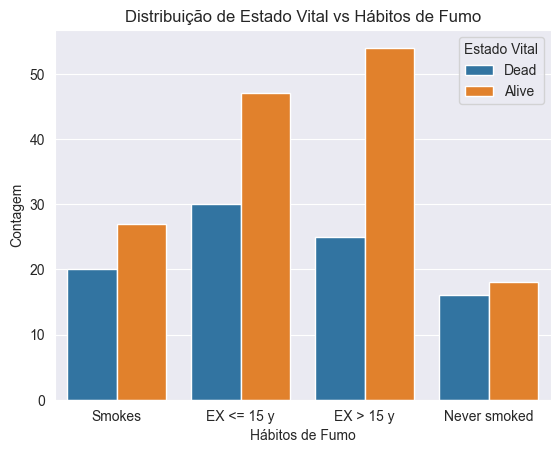

In [105]:
# Corre fumo com vital
import scipy.stats as stats

contingency_table = pandas.crosstab(vital_vs_smoke['Vital Status'], vital_vs_smoke['Smoke Habits'])
alpha = 0.05
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print(f'Estatística de teste:{chi2}',
      f'Graus de liberdade:{dof}',
      f'Valor de prova:{p}',
      f'Para alfa = {0.05}:',
      sep = '\n')

# para 95% IC
if p < 0.05:
    print('É plausível considerar correlação')
    
else:
    print('Não é plausível considerar correlação')

seaborn.countplot(x='Smoke Habits', hue = 'Vital Status', data = vital_vs_smoke)
pyplot.title('Distribuição de Estado Vital vs Hábitos de Fumo')
pyplot.xlabel('Hábitos de Fumo')
pyplot.ylabel('Contagem')
pyplot.legend(title = 'Estado Vital')
pyplot.show()


    

In [106]:

# Pipeline
# https://pydeseq2.readthedocs.io/en/latest/auto_examples/plot_pandas_io_example.html
# https://pydeseq2.readthedocs.io/en/latest/auto_examples/plot_step_by_step.html

import pickle
from pydeseq2.dds import DeseqDataSet
from pydeseq2.default_inference import DefaultInference
from pydeseq2.ds import DeseqStats

In [107]:

counts = seqdata_clean
counts_df = counts.T
metadata = meta_clean[['expr']]
# Verificar se dados correspondem
if (counts_df.index == meta_clean.index).all():
    print('dados correspondem corretamente')

genes_to_keep = counts_df.columns[counts_df.sum(axis=0) >= 10]
counts_df = counts_df[genes_to_keep]

inference = DefaultInference(n_cpus=8)



dados correspondem corretamente


In [108]:
dds = DeseqDataSet(
    counts = counts_df,
    metadata = metadata,
    design_factors='expr',
    refit_cooks=True,
    inference = inference
)

dds.deseq2()


Fitting size factors...
... done in 0.67 seconds.

Fitting dispersions...
... done in 8.80 seconds.

Fitting dispersion trend curve...
... done in 0.73 seconds.

Fitting MAP dispersions...
... done in 8.74 seconds.

Fitting LFCs...
... done in 5.84 seconds.

Replacing 8916 outlier genes.

Fitting dispersions...
... done in 1.38 seconds.

Fitting MAP dispersions...
... done in 1.33 seconds.

Fitting LFCs...
... done in 1.13 seconds.



In [109]:
print(dds)

AnnData object with n_obs × n_vars = 248 × 52310
    obs: 'expr'
    uns: 'trend_coeffs', 'disp_function_type', '_squared_logres', 'prior_disp_var'
    obsm: 'design_matrix', 'size_factors', 'replaceable'
    varm: 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', '_normed_means', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced', 'refitted'
    layers: 'normed_counts', '_mu_hat', '_mu_LFC', '_hat_diagonals', 'cooks', 'replace_cooks'


In [110]:
# Guardar para acelerar o processo mais á frente com o load (estilo RDA/RDS)
# open("dds.pkl", "wb") as f:
#    pickle.dump(dds, f)
    
# 
#with open('dds.pkl', 'rb') as f:
#    pickle.load(f)

In [115]:
dds.varm["dispersions"]

array([0.24109243, 4.63594369, 0.16680929, ..., 0.2182571 , 0.21828831,
       0.29929392])

In [116]:
dds.varm['LFC']

,intercept,expr_prox.-inflam_vs_TRU,expr_prox.-prolif._vs_TRU
Genes,,,
TSPAN6,8.065153,0.038609,0.166654
TNMD,1.544555,0.830857,0.321819
DPM1,7.118708,0.294265,0.324479
SCYL3,6.709212,-0.118642,-0.046035
C1orf112,5.606907,0.502914,0.435259
...,...,...,...
ENSG00000288667,0.406080,0.280074,-1.755468
ENSG00000288669,-1.476283,0.595990,-0.035252
ENSG00000288670,5.555485,-0.115076,0.037997


In [118]:
stat_res = DeseqStats(dds, inference= inference)
stat_res.summary()

Running Wald tests...
... done in 2.05 seconds.



Log2 fold change & Wald test p-value: expr prox.-inflam vs TRU
                    baseMean  log2FoldChange     lfcSE      stat  \
Genes                                                              
TSPAN6           3372.659142        0.055701  0.104359  0.533749   
TNMD                7.405713        1.198674  0.465215  2.576601   
DPM1             1505.153644        0.424534  0.086944  4.882840   
SCYL3             778.112463       -0.171164  0.076256 -2.244583   
C1orf112          373.207836        0.725551  0.097846  7.415237   
...                      ...             ...       ...       ...   
ENSG00000288667     1.368924        0.404061  0.983904  0.410671   
ENSG00000288669     0.200104        0.859831  0.967010  0.889165   
ENSG00000288670   251.434561       -0.166020  0.100246 -1.656119   
ENSG00000288674     5.382479       -0.612823  0.136808 -4.479424   
ENSG00000288675    13.979935       -0.184320  0.129677 -1.421377   

                       pvalue          padj  
Genes 